# Overcoming Gibb's: Filters

For two introductions into the topic of filters and mollifiers see
<!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.01//EN" "http://www.w3.org/TR/html4/strict.dtd">
<html lang="en">
<head>
<title>JabRef References output</title>
<meta http-equiv="Content-Type" content="text/html; charset=UTF-8">
<style type="text/css">
body { font-size: 12px; font-family: Arial, sans-serif; }
dt { margin-top: 1em; font-weight: bold; }
@media print {
	dt { page-break-after: avoid; }
	dd { page-break-before: avoid; }
}
</style>
</head>
<body>
<dl>
<dd>Tadmor, E.</dd>
<dd><i>Filters, mollifiers and the computation of the Gibbs phenomenon</i></dd>
<dd>Acta Numerica, Cambridge University Press, <b>2007</b>, Vol. 16, pp. 305-378</dd>

</dl>
</body>
</html>

and 

<!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.01//EN" "http://www.w3.org/TR/html4/strict.dtd">
<html lang="en">
<head>
<title>JabRef References output</title>
<meta http-equiv="Content-Type" content="text/html; charset=UTF-8">
<style type="text/css">
body { font-size: 12px; font-family: Arial, sans-serif; }
dt { margin-top: 1em; font-weight: bold; }
@media print {
	dt { page-break-after: avoid; }
	dd { page-break-before: avoid; }
}
</style>
</head>
<body>
<dl>
<dd>Tanner, J.</dd>
<dd><i>Optimal filter and mollifier for piecewise smooth spectral data</i></dd>
<dd>Mathematics of computation, <b>2006</b>, Vol. 75(254), pp. 767-790</dd>

</dl>
</body>
</html>

Personally, my experience with filters is that they are not as accurate as other methods to handle data with one discontinuity at a known position. However, they are very useful when you do not know and cannot easily detect the location of the discontuity/discontinuities in the data. 



/home/xerox/.local/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1369: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


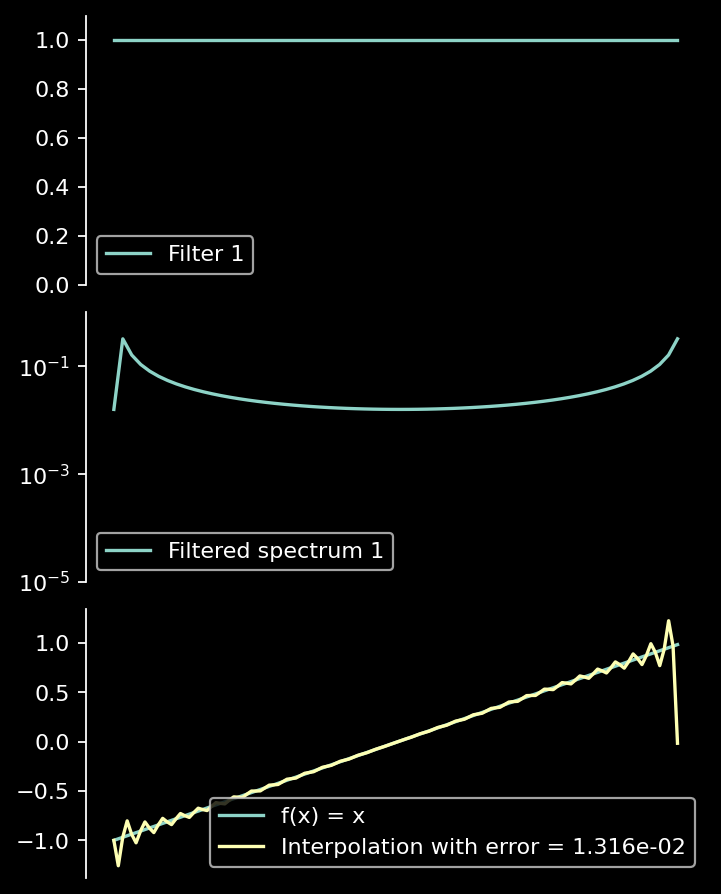

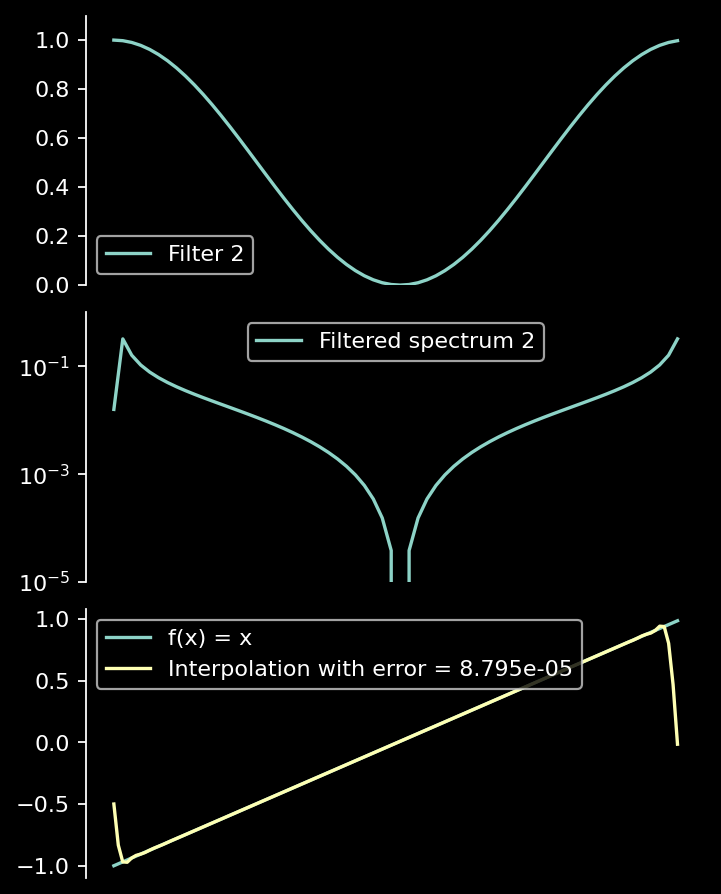

In [11]:
# import libraries
import numpy as np
import scipy
import scipy.integrate
from scipy.fft import fft, ifft
import matplotlib.pyplot as plt
plt.style.use('dark_background')

def sigma0(eta):
    return np.ones(eta.shape)

def sigma1(eta):
    return 0.5 * ( 1 + np.cos ( np.pi * eta ) )

filters = [sigma0, sigma1]

# Number of sample points
N  = 64
Ni = 128
x  = np.linspace(-1, 1, N,  endpoint=False)
xi = np.linspace(-1, 1, Ni, endpoint=False)

# Sampled function values
def func(x):
    return x
f = func(x)

def interpolate(y, Ni, s):
    N             = len(y)
    yhat          = fft(y, norm="forward")
    yhat_filtered = yhat * s
    Npad          = int(Ni/2 - N/2)
    yt            = np.fft.fftshift(yhat_filtered)
    ypad          = np.concatenate([np.zeros(Npad), yt, np.zeros(Npad)])
    ypad          = np.fft.fftshift(ypad)
    yi            = ifft(ypad, norm="forward")
    return yhat, yi

# Plot the results
for i, filter in enumerate(filters):
    # Create sigma function for the current filter
    def sigma(x):
        k = np.fft.fftfreq(len(x))
        k /= np.max(np.abs(k))
        return filter(np.abs(k))

    fig, ax = plt.subplots(3, 1, figsize=(5, 7), dpi=160)
    s          = sigma(x)
    fhat, fint = interpolate(f, Ni, s)


    k = np.fft.fftfreq(len(x))
    ax[0].plot(s, label=f"Filter {i + 1}")  # Plot the filter
    ax[0].set_ylim(0, 1.1)

    ax[0].legend()
    ax[1].set_yscale("log")
    ax[1].set_ylim(1e-5, 1)
    ax[1].plot(np.abs(fhat) * s, label=f"Filtered spectrum {i + 1}")  # Plot the magnitude of the Fourier coefficients
    ax[1].legend()
    ax[2].plot(xi, func(xi), label="f(x) = x")  # Plot the error
    ax[2].plot(xi, fint, label=f"Interpolation with error = {np.mean(np.abs(fint[8:-8] - func(xi)[8:-8])):3.3e}")  # Plot the error
    ax[2].legend()


    for j in range(3):
        ax[j].spines['top'].set_visible(False)
        ax[j].spines['right'].set_visible(False)
        ax[j].spines['bottom'].set_visible(False)
        #ax[i].spines['left'].set_visible(False)
        ax[j].get_xaxis().set_ticks([])
        #ax[i].get_yaxis().set_ticks([])

    fig.subplots_adjust(hspace=0.1)


    plt.savefig(f"figures/filter_{i+1}.png")

    plt.show()